# Credit risk for mortgages

## Part 1

### 1)

Expected utility for giving loan = Probability of default \* cost of default + probability of downpayment \* interest gain  
Expected utility for not giving loan = 0

\begin{align}
E(U) &= P \cdot L \cdot ((1+R)^T-1) - (1-P) \cdot L \\
&= PL(1+R)^T - PL - L + PL \\
&= L(P(1+R)^T-1)
\end{align}

In [39]:
def expected_utility():
    return loan * (get_proba() * (1+interest_rate)**duration - 1)

If the expected utility of giving the loan is positive, we give loan, if negative, we don't.

### 2)

##### Questions to self:
+ Should the ordered qualitative attributes be made numeric? If so, what should the number conversions be? F.ex checking account, for the first two categories we can use the center, but what about the third where there is no center? Same holds for several of the other ordered qualitative attributes. Is an option for the (x,->)-intervals to use an expectation assuming f.ex an exponential distribution in the category? Or is it better to just number them and model that attribute non-linearly?
+ Should we just use kNN, or are we free to select any method? Or should we try many different methods and select the best one?
+ How should we select? Should we just use a quarter of the data as a holdout for method selection, and then trim parameters for each method using cv on the remaining three quarters? Or is it better to use some kind of neural network kind of method to combine many other methods. How involved should we do this?

In [42]:
import pandas as pd
import numpy as np

In [43]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = ['repaid']

In [44]:
df = pd.read_csv('../../data/credit/german.data', sep=' ',
                     names=features+target)

In [45]:
numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [f for f in features if f not in numeric_features]

In [46]:
# Treat the categorical features differently by expanding them into binary features 
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [47]:
print(numeric_features)
print(categorical_features)

['duration', 'amount', 'installment', 'residence time', 'age', 'credits', 'persons']
['checking account balance', 'credit history', 'purpose', 'savings', 'employment', 'marital status', 'other debtors', 'property', 'other installments', 'housing', 'job', 'phone', 'foreign']


In [30]:
df.describe()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000,0.269000,0.063000,...,0.154000,0.047000,0.814000,0.713000,0.108000,0.2000,0.630000,0.148000,0.404000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.443662,0.243085,...,0.361129,0.211745,0.389301,0.452588,0.310536,0.4002,0.483046,0.355278,0.490943,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000


In [48]:
features = df.drop(target, axis=1).select_dtypes(include=[np.number]).columns.tolist()
binary_features = [f for f in features if f not in numeric_features]

In [49]:
df[target+features][:5]

,repaid,duration,amount,installment,residence time,age,credits,persons,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,1,6,1169,4,4,67,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,2,48,5951,2,2,22,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,1,12,2096,2,3,49,1,2,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1,42,7882,2,4,45,1,2,0,0,...,0,0,1,0,1,0,1,0,0,0
4,2,24,4870,3,4,53,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [33]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)

In [10]:
X_train.describe()

,duration,amount,installment,residence time,age,credits,persons,checking account balance_A12,checking account balance_A13,checking account balance_A14,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000
mean,20.737333,3211.626667,2.974667,2.817333,35.658667,1.404000,1.166667,0.266667,0.058667,0.392000,...,0.150667,0.052000,0.805333,0.721333,0.105333,0.204000,0.622667,0.15200,0.413333,0.030667
std,11.961512,2657.080252,1.125336,1.109478,11.282785,0.569107,0.372927,0.442512,0.235157,0.488522,...,0.357962,0.222175,0.396208,0.448642,0.307187,0.403238,0.485043,0.35926,0.492760,0.172528
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,12.000000,1360.250000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,18.000000,2327.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
75%,24.000000,3963.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_test_unscaled = X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [16]:
X_train

array([[ 0.25118621, -0.25697644,  0.93746784, ..., -0.40793071,
        -0.80071084, -0.19324699],
       [-1.22831372, -0.7195821 , -1.72579308, ..., -0.40793071,
        -0.80071084, -0.19324699],
       [-0.89953596, -0.14674757, -1.72579308, ..., -0.40793071,
        -0.80071084, -0.19324699],
       ...,
       [ 2.22385279,  0.95660782, -0.83803944, ..., -0.40793071,
        -0.80071084, -0.19324699],
       [-1.22831372,  4.13724399, -1.72579308, ...,  2.4513967 ,
         1.24889029, -0.19324699],
       [-0.73514708,  0.08473305,  0.0497142 , ..., -0.40793071,
        -0.80071084, -0.19324699]])

In [56]:
from sklearn.neural_network import MLPClassifier

In [29]:
# Solver 'lbgfs' for faster and better results on small datasets
# We start with alpha 1e-4 (default)
# Start with only one hidden layer, size 70 is a bit more than features ...
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(70))

In [30]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=70, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scipy import stats

In [24]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.736

In [58]:
n_folds = 10
alphas = np.logspace(-5, 0, 21)
accuracies = np.zeros(len(alphas))
deviations = np.zeros(len(alphas))
i = 0
for alpha in alphas:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(70))
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
% matplotlib inline

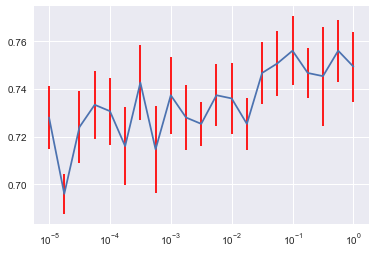

In [60]:
plt.errorbar(alphas, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

In [64]:
# Here we could perhaps have made some clever claculation to 
# find the best alpha using 1e-4 as default and the deviations 
# to select the closest to default among the somewhat significant
# or we could just go default, or we could just use the best
# even though which one is best changes for every run.
nn_alpha = alphas[np.argmax(accuracies)]

So alpha setting doesn't seem to matter much here, perhaps layer size is more important

Out of curiousity, we might try to see if we get more conclusive results if we judge the alphas by utility rather than accuracy

In [19]:
def expected_utility(loan, rate, time, prob):
    return loan * (prob * (1+rate)**time - 1)
def utility(loan, rate, time, outcome):
    return loan * (-1 if outcome==2 else (1+rate)**time - 1)

In [40]:
n_folds = 10
rate = 0.005
alphas = np.logspace(-5, -3, 11)
accuracies = np.zeros(len(alphas))
deviations = np.zeros(len(alphas))
i = 0
for alpha in alphas:
    util = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(70))
        classifier.fit(X_train[train], y_train[train])
        for k in range(len(y_train[test])):
            prob = classifier.predict_proba(X_train[test[k]].reshape(1,-1))[0,0]
            loan, time = X_test_unscaled[k:k+1][['amount', 'duration']].values.ravel()
            util[j] += utility(loan, rate, time, y_train[test[k]]) \
                        if expected_utility(loan, rate, time, prob) > 0 \
                        else 0 
                                         
        j += 1
    accuracies[i] = np.mean(util)
    deviations[i] = stats.sem(util)
    i += 1

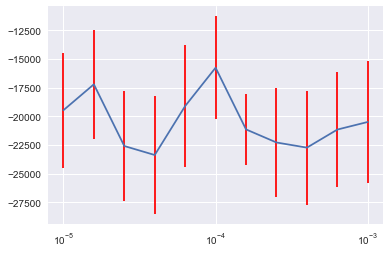

In [43]:
plt.errorbar(alphas, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

Again no significant difference between the alphas

Now for layer sizes

In [65]:
n_folds = 10
hidden_components = np.arange(10, 230, 10)
accuracies = np.zeros(len(hidden_components))
deviations = np.zeros(len(hidden_components))
i = 0
for components in hidden_components:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(components))
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

<Container object of 3 artists>

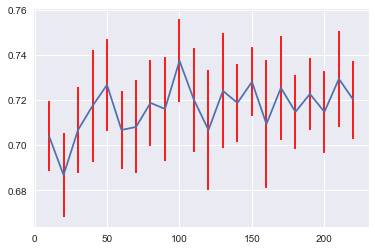

In [66]:
plt.errorbar(hidden_components, accuracies, yerr=deviations, ecolor='r')

So number of components also make little difference above, say 40 if even then. Perhaps try some combinations of multiple layers of different sizes, computationally it seems prohibitive to try all combinations of multiple layers of different sizes.

In [67]:
# Some sort of attempt to order the combinations in increasing complexity
n_folds = 10
hidden_components = [(50), (70), (100), \
                     (50, 10), (70, 10), (100, 10), \
                     (50, 30), (70, 30), (100, 30), \
                     (50, 50), (70, 50), (100, 50), \
                     (50, 70), (70, 70), (100, 70), \
                     (50, 30, 10), (70, 30, 10), (100, 30, 10), \
                     (16, 4, 2)]
accuracies = np.zeros(len(hidden_components))
deviations = np.zeros(len(hidden_components))
i = 0
for components in hidden_components:
    accuracy = np.zeros(n_folds)
    j = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        classifier = MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=components)
        classifier.fit(X_train[train], y_train[train])
        y_pred = classifier.predict(X_train[test])
        accuracy[j] = accuracy_score(y_train[test], y_pred)
        j += 1
    accuracies[i] = np.mean(accuracy)
    deviations[i] = stats.sem(accuracy)
    i += 1

<Container object of 3 artists>

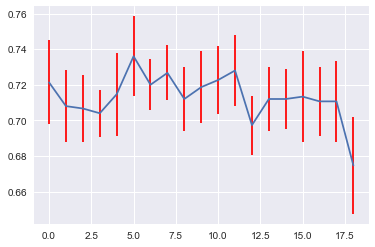

In [68]:
plt.errorbar(range(len(hidden_components)), accuracies, yerr=deviations, ecolor='r')

In [69]:
# Here we have to see if we should pick from the range above, 
# or from this list of combinations, or we could choose from
# among all those options. Once again we could probably create 
# some algorithm to choose based on the deviations. Again it 
# looks quite random which one performs best, so we might as 
# well just go argmax again. Another simple option might have 
# been argmax(accuracies-deviations)
nn_hidden_components = hidden_components[np.argmax(accuracies)]

Once again it's hard to point out any specific combination of layers that seems better than the others.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import resample

In [71]:
n_features = len(features)

In [72]:
n_bootstraps = 100
n_folds = 10
accuracies = np.zeros(n_features-1)
deviations = np.zeros(n_features-1)
pca = PCA()
X_pca = pca.fit_transform(X_train)
for components in range(1, n_features):
    accuracy = np.zeros(n_bootstraps * n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_pca):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_pca[train, :components], y_train[train])
            Xte, yte = resample(X_pca[test, :components], y_train[test])
            y_pred = LogisticRegression().fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[components-1] = np.mean(accuracy)
    deviations[components-1] = stats.sem(accuracy)

<Container object of 3 artists>

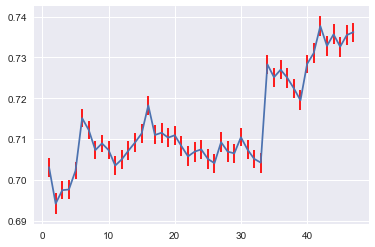

In [73]:
plt.errorbar(np.arange(1,n_features), accuracies, yerr=deviations, ecolor='r')

It looks like we get better predictions the more components we add, so we might as well drop the PCR and use all

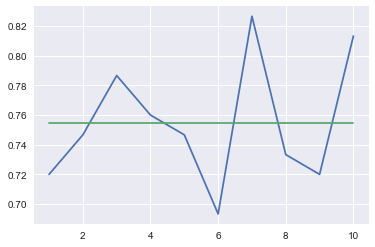

In [74]:
i = 0
accuracies = np.zeros(10)
for train, test in KFold(n_splits=10).split(X_train):
    y_pred = LogisticRegression().fit(X_train[train], y_train[train]).predict(X_train[test])
    accuracies[i] = accuracy_score(y_pred, y_train[test])
    i += 1
plt.plot(np.arange(1,11), accuracies, np.arange(1,11), [np.average(accuracies) for _ in range(1,11)])

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
n_folds = 10
ks = np.arange(1, int((n_folds-1)*len(X_train)/n_folds))
accuracies = np.zeros(len(ks))
deviations = np.zeros(len(ks))
for k in ks:
    accuracy = np.zeros(n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        y_pred = KNeighborsClassifier(n_neighbors=k).fit(X_train[train], y_train[train]).predict(X_train[test])
        accuracy[i] = accuracy_score(y_pred, y_train[test])
        i += 1
    accuracies[k-1] = np.mean(accuracy)
    deviations[k-1] = stats.sem(accuracy)

<Container object of 3 artists>

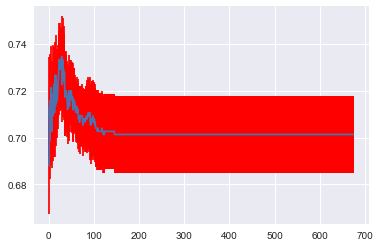

In [78]:
plt.errorbar(ks, accuracies, yerr=deviations, ecolor='r')

In [79]:
n_folds = 10
# Ks from 1 to the maximum number of point in the cv training set
# This could be a huge number, perhaps we should limit it somehow?
# ks = np.arange(1, int(((n_folds-1)/n_folds)*len(X_train)))
# Perhaps it's better to choose differently. Perhaps not every k
# in the interval, and perhaps we don't need the upper half?
n_tr_points = int(((n_folds-1)/n_folds)*len(X_train))
# Start at 1 (10**0), end at n_tr_point/2 (10**np.log10(int(n_tr_point/2)))
ks = np.logspace(0, np.log10(int(n_tr_points/2)), 50)
accuracies = np.zeros(len(ks))
deviations = np.zeros(len(ks))
n_bootstraps = 100
j = 0
for k in ks:
    k = int(k)
    accuracy = np.zeros(n_folds*n_bootstraps)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_train):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_train[train], y_train[train])
            Xte, yte = resample(X_train[test], y_train[test])
            y_pred = KNeighborsClassifier(n_neighbors=k).fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[j] = np.mean(accuracy)
    deviations[j] = stats.sem(accuracy)
    j += 1

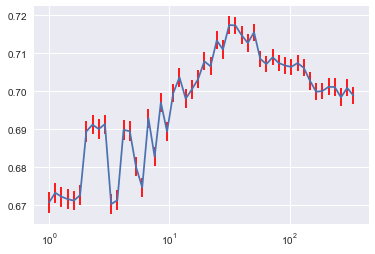

In [80]:
plt.errorbar(ks, accuracies, yerr=deviations, ecolor='r')
plt.xscale('log')

In [94]:
# Once again we have many candidates for best k, so which one do we pick?
# This time, lets go
knn_k = int(ks[np.argmax(accuracies-deviations)])
# Though I suppose an even better option, here and for the NN
# might be to create multiple approximately evenly good models
# and use all of them

Could we perhaps improve our kNN by reducing the dimensionality?

In [142]:
n_bootstraps = 100
n_folds = 10
accuracies = np.zeros(n_features-1)
deviations = np.zeros(n_features-1)
pca = PCA()
X_pca = pca.fit_transform(X_train)
# We already have this: X_pca = pca.fit_transform(X_train)
for components in range(1, n_features):
    accuracy = np.zeros(n_bootstraps * n_folds)
    i = 0
    for train, test in KFold(n_splits=n_folds).split(X_pca):
        for B in range(n_bootstraps):
            Xtr, ytr = resample(X_pca[train, :components], y_train[train])
            Xte, yte = resample(X_pca[test, :components], y_train[test])
            y_pred = KNeighborsClassifier(n_neighbors=knn_k).fit(Xtr, ytr).predict(Xte)
            accuracy[i] = accuracy_score(y_pred, yte)
            i += 1
    accuracies[components-1] = np.mean(accuracy)
    deviations[components-1] = stats.sem(accuracy)

<Container object of 3 artists>

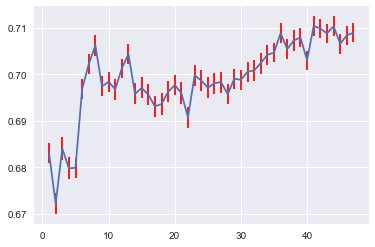

In [143]:
plt.errorbar(np.arange(1,n_features), accuracies, yerr=deviations, ecolor='r')

It seems that here also, as with Logistic regression, we might as well use all the components

Let's now check the accuracy of always granting

In [84]:
accuracy_score(np.ones(len(y_train)), y_train)

0.7013333333333334

OK, so now we have three methods that seem fairly equally good at prediction, but with accuracies around 0.73 they arn't very much better than the base at 0.70, so where do we go from here? What happens if we try to use each of the three and classify by majority vote? Will that improve accuracy? Shoudl we somehow weigh the methods? Other things to try, what if we rewind and instead of creating dummies for all categorical features we give ordered values to the features with ordered categories?

Try some kind of likelihood calculation based on get_proba() from all methods and then use that to rate the methods to weigh them, then compare the performance of each on the test set vs the combination of the three.

Make sure to, during fitting, store the feature transformations so that we can use them to transform new data to be predicted

In [95]:
# Should we create multiple models of each kind by 
# bootstrapping the training set, or just create one of each
# using the whole training set? Lets go with the simple approach
classifiers = [MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components).fit(X_train, y_train), \
               LogisticRegression().fit(X_train, y_train), \
               KNeighborsClassifier(n_neighbors=knn_k).fit(X_train, y_train)]

In [97]:
probabilities = np.zeros((len(X_test), len(classifiers)), dtype=np.float64)
for i in range(len(X_test)):
    for j in range(len(classifiers)):
        probabilities[i, j] = classifiers[j].predict_proba(X_test[i].reshape(1, -1))[:,y_test[i]-1]
# We do y_test-1 to get outcomes 1, 2 to 0, 1 to correspond to indices

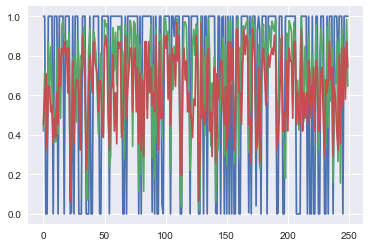

In [98]:
plt.plot(range(len(X_test)), probabilities)

In [99]:
n_ways_of_weighing = 3
weights = np.zeros((n_ways_of_weighing, len(classifiers)))

In [100]:
# We could have started with np.ones(len(classifiers))/len(classifiers)
# but this way is even more uninformed
method_weights = np.array([probabilities[0, j] for j in range(len(classifiers))])
method_weights /= np.sum(method_weights)
for i in range(1, len(X_test)):
    method_weights *= probabilities[i, :]
    method_weights /= np.sum(method_weights)

In [101]:
weights[0, :] = method_weights
method_weights

array([0.00000000e+00, 9.99221303e-01, 7.78696814e-04])

Well, from this it looks like the logistic regression is the only one worth anything and we might just go ahead with only that one, but perhaps it's better to keep them all around in case the others perform better on different datasets or runs.

But what if we try weighing them on utility instead?

In [102]:
rate = 0.005
max_loan = X_test_unscaled['amount'].max()
def utility(loan, rate, time, outcome):
    return loan * (-1 if outcome==2 else (1+rate)**time - 1)

In [103]:
def expected_utility(loan, rate, time, prob):
    return loan * (prob * (1+rate)**time - 1)

In [104]:
method_weights = np.ones(len(classifiers))/len(classifiers)
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    loan /= max_loan
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    # Utility with numbers above will range between -1 and ca 0.43, and we
    # can't use negative numbers (or especially the quite likely utility 0)
    # So we have to transform it somehow before use. Adding 2 to make it 
    # range from 1 to ca 2.43 seems reasonable
    method_weights *= 2 + np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    method_weights /= np.sum(method_weights)

In [105]:
weights[1, :] = method_weights
method_weights

array([0.00442713, 0.46454614, 0.53102673])

Suddenly things are looking different. Out of curiousity, what would have happened with different utility transformations, I wonder.

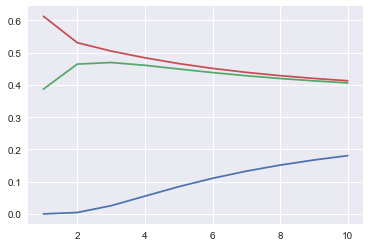

In [106]:
xvals = np.arange(10)
yvals = np.zeros((len(xvals), len(classifiers)))
for trans in xvals:
    method_weights = np.ones(len(classifiers))/len(classifiers)
    for i in range(len(X_test)):
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        # Utility with numbers above will range between -5 and ca 4.1, and we
        # can't use negative numbers (or especially the quite likely utility 0)
        # So we have to transform it somehow before use. Adding 10 to make it 
        # range from 5 to ca 14.1 seems reasonable
        method_weights *= (1+trans) + np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        method_weights /= np.sum(method_weights)
    yvals[trans] = method_weights
plt.plot(1+xvals, yvals)

As expected increasing the transformations evens out the weighing since higher transformation value makes the difference between correct and incorrect classification less, but it's evening out slower than I had expected

Perhaps it's also possible to weigh them based on total utility over the test set?

In [107]:
method_utility = np.zeros(len(classifiers))
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    method_utility += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])

# Adjust away possible negative numbers (if you lose money, you get 0 weight)
method_weight = method_utility - min(0, np.min(method_utility))
method_weight = method_weight / np.sum(method_weight)
print(method_utility)

[-114901.54409832    2234.5352978     4272.59868684]


In [108]:
weights[2, :] = method_weight
method_weight

array([0.        , 0.49568774, 0.50431226])

Now check for each of the three ways of weighing the methods, which gives the best utility over the test set. Perhaps we are now overusing the test set and that we ought to have had another?

In [109]:
weights.T

array([[0.00000000e+00, 4.42712950e-03, 0.00000000e+00],
       [9.99221303e-01, 4.64546141e-01, 4.95687738e-01],
       [7.78696814e-04, 5.31026729e-01, 5.04312262e-01]])

In [110]:
probabilities[0, :]

array([1.        , 0.41961795, 0.4516129 ])

In [111]:
probabilities[0, :] @ weights.T

array([0.41964286, 0.43917755, 0.4357534 ])

In [112]:
weighing_utility = np.zeros(n_ways_of_weighing)
for i in range(len(X_test)):
    loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
    prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
    prob = prob @ weights.T
    weighing_utility += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])

weighing_utility

array([2234.5352978 , 8626.33630585, 8626.33630585])

OK, not so surprising that the weighing method that maximizes utility over the test set gets the highest utility over the test set, I suppose, so let's do it better and fit weights and then test using XV over the test set. And lets also add the stupid weighing, equal weight for all models as well as variants for the second with transformations of 1, 3 and 4. Finally we'll add three weighings that basically are one for each of the methods

In [121]:
n_folds = 5
n_ways_of_weighing = 10
weights = np.zeros((n_ways_of_weighing, len(classifiers)))
weighing_utility = np.zeros((n_folds, n_ways_of_weighing))
n = 0
for train, test in KFold(n_splits=n_folds).split(X_test):
    # Fit weights
    weights[0, :] = np.ones(len(classifiers))/len(classifiers)
    weights[1, :] = np.ones(len(classifiers))/len(classifiers)
    weights[2, :] = np.ones(len(classifiers))/len(classifiers)
    weights[3, :] = np.ones(len(classifiers))/len(classifiers)
    weights[4, :] = np.ones(len(classifiers))/len(classifiers)
    weights[5, :] = np.zeros(len(classifiers))
    weights[6, :] = np.ones(len(classifiers))/len(classifiers)
    weights[7, :] = np.array([1, 0, 0])
    weights[8, :] = np.array([0, 1, 0])
    weights[9, :] = np.array([0, 0, 1])
    for i in train:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        util = np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        
        weights[0, :] *= probabilities[i, :]
        weights[0, :] /= np.sum(weights[0, :])
        weights[1, :] *= 1 + util
        weights[1, :] /= np.sum(weights[1, :])
        weights[2, :] *= 2 + util
        weights[2, :] /= np.sum(weights[2, :])
        weights[3, :] *= 3 + util
        weights[3, :] /= np.sum(weights[3, :])
        weights[4, :] *= 4 + util
        weights[4, :] /= np.sum(weights[4, :])
        weights[5, :] += util

    # Adjust away possible negative numbers (if you lose money, you get 0 weight)
    weights[5, :] -= min(0, np.min(weights[5, :]))
    weights[5, :] /= np.sum(weights[5, :])
    
    # Test performance
    for i in test:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        prob = prob @ weights.T
        weighing_utility[n, :] += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    
    n += 1

In [122]:
weighing_utility

array([[  1345.74773801,    955.66953755,   1286.66643502,
          1286.66643502,   1286.66643502,   1286.66643502,
          2335.49040725, -33946.41198111,   1535.53036511,
          1226.57799191],
       [  6112.49286342,   4667.04350702,   4853.46378721,
          5015.9739812 ,   5194.75657827,   4853.46378721,
          5618.42508618, -14978.13215693,   6112.49286342,
          3578.88414814],
       [-11804.29741698,  -6644.28622898,  -6644.28622898,
         -6644.28622898,  -6644.28622898,  -6644.28622898,
         -6302.98938964, -21690.12988474, -11804.29741698,
         -2728.15031022],
       [  5266.53618519,   2043.44949185,   3100.34156443,
          3100.34156443,   3100.34156443,   3100.34156443,
          6049.49045954, -30233.85515621,   5266.53618519,
           894.44186583],
       [   783.65044154,     87.15074816,     87.15074816,
            87.15074816,     87.15074816,     87.15074816,
          2025.36260678, -14053.01491934,   1124.27330105,
          1

In [123]:
np.mean(weighing_utility, axis=0)

array([   340.82596224,    221.80541112,    536.66726117,    569.16929997,
          604.92581938,    536.66726117,   1945.15583402, -22980.30881966,
          446.90705956,    854.51973737])

In [124]:
stats.sem(weighing_utility)

array([3211.5786088 , 1881.20216525, 1968.98216173, 1986.98250617,
       2007.20679988, 1968.98216173, 2219.56260954, 3989.14353222,
       3217.63596653, 1014.81312235])

<Container object of 3 artists>

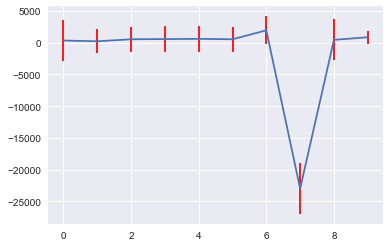

In [117]:
plt.errorbar(range(n_ways_of_weighing), np.mean(weighing_utility, axis=0), yerr=1*stats.sem(weighing_utility), ecolor='r')

So in conclusion it seems hard to know which method works best, other than that the neural nets seem wto work quite poorly, and that that and logistic regression seems to give high variance. Which weighing method to use here is a question. One way is to go with simply argmax, another is to use the highest lower end of a $2\sigma$ interval, but I'll go with a compromise between the two: the lower end of the $\sigma$ interval. First though, it might be interesting to try this out using Bagging on the classifiers.

In [125]:
from sklearn.ensemble import BaggingClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<Container object of 3 artists>

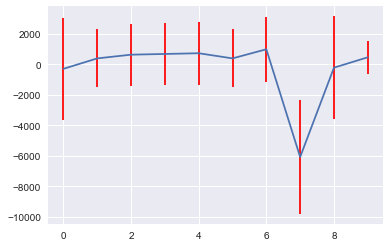

In [126]:
classifiers = [BaggingClassifier(MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components)).fit(X_train, y_train), \
               BaggingClassifier(LogisticRegression()).fit(X_train, y_train), \
               BaggingClassifier(KNeighborsClassifier(n_neighbors=knn_k)).fit(X_train, y_train)]

probabilities = np.zeros((len(X_test), len(classifiers)), dtype=np.float64)
for i in range(len(X_test)):
    for j in range(len(classifiers)):
        probabilities[i, j] = classifiers[j].predict_proba(X_test[i].reshape(1, -1))[:,y_test[i]-1]
# We do y_test-1 to get outcomes 1, 2 to 0, 1 to correspond to indices

n_folds = 5
n_ways_of_weighing = 10
weights = np.zeros((n_ways_of_weighing, len(classifiers)))
weighing_utility = np.zeros((n_folds, n_ways_of_weighing))
n = 0
for train, test in KFold(n_splits=n_folds).split(X_test):
    # Fit weights
    weights[0, :] = np.ones(len(classifiers))/len(classifiers)
    weights[1, :] = np.ones(len(classifiers))/len(classifiers)
    weights[2, :] = np.ones(len(classifiers))/len(classifiers)
    weights[3, :] = np.ones(len(classifiers))/len(classifiers)
    weights[4, :] = np.ones(len(classifiers))/len(classifiers)
    weights[5, :] = np.zeros(len(classifiers))
    weights[6, :] = np.ones(len(classifiers))/len(classifiers)
    weights[7, :] = np.array([1, 0, 0])
    weights[8, :] = np.array([0, 1, 0])
    weights[9, :] = np.array([0, 0, 1])
    for i in train:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        loan /= max_loan
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        util = np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
        
        weights[0, :] *= probabilities[i, :]
        weights[0, :] /= np.sum(weights[0, :])
        weights[1, :] *= 1 + util
        weights[1, :] /= np.sum(weights[1, :])
        weights[2, :] *= 2 + util
        weights[2, :] /= np.sum(weights[2, :])
        weights[3, :] *= 3 + util
        weights[3, :] /= np.sum(weights[3, :])
        weights[4, :] *= 4 + util
        weights[4, :] /= np.sum(weights[4, :])
        weights[5, :] += util

    # Adjust away possible negative numbers (if you lose money, you get 0 weight)
    weights[5, :] -= min(0, np.min(weights[5, :]))
    weights[5, :] /= np.sum(weights[5, :])
    
    # Test performance
    for i in test:
        loan, time = X_test_unscaled[i:i+1][['amount', 'duration']].values.ravel()
        prob = probabilities[i, :] if y_test[i] == 1 else 1-probabilities[i, :]
        prob = prob @ weights.T
        weighing_utility[n, :] += np.array([utility(loan, rate, time, y_test[i]) if eu > 0 else 0 for eu in expected_utility(loan, rate, time, prob)])
    
    n += 1
    
plt.errorbar(range(n_ways_of_weighing), np.mean(weighing_utility, axis=0), yerr=1*stats.sem(weighing_utility), ecolor='r')

Hmmm, well, it seems no better performance, except on the neural nets, and no less variance, so not much point to move forward on.

In [118]:
method_weights = weights[np.argmax(np.mean(weighing_utility, axis=0) - stats.sem(weighing_utility))]
method_weights

array([0., 0., 1.])

For reference it might be interesting to see the test set earning of the base classifier of always granting a loan, basically mimicking the bank(s) the data is collected from. And also the perfect classfier

In [119]:
amounts = X_test_unscaled['amount'].values.ravel()
durations = X_test_unscaled['duration'].values.ravel()
reference_utility1 = np.array([utility(amounts[i], rate, durations[i], y_test[i]) for i in range(len(y_test))])
reference_utility2 = np.array([utility(amounts[i], rate, durations[i], y_test[i]) if y_test[i] == 1 else 0 for i in range(len(y_test))])

In [120]:
print("Total utility for always granting: " + str(np.sum(reference_utility1)))
print("Total utility for perfect classifier: " + str(np.sum(reference_utility2)))

Total utility for always granting: -234990.75699153283
Total utility for perfect classifier: 63816.24300846715


In this range (-235k, 64k) our best classifier around 3000 is quite close to zero

Now the question is only, have I tortured the data too much?

So, let's boil it down to an implementation

In [ ]:
def fit(self):
    X = df[features].values
    y = df[target].values.ravel()
    scaler = StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)[:, :lr_components]

    classifiers = [MLPClassifier(solver='lbfgs', alpha=nn_alpha, hidden_layer_sizes=nn_hidden_components).fit(X, y), 
                   LogisticRegression().fit(X_pca, y), 
                   KNeighborsClassifier(n_neighbors=knn_k).fit(X, y)]

In [ ]:
def predict_proba(self, x):
    x = scaler.transform(x)
    x_pca = pca.transform(x)
    return  classifier[0].predict_proba(x)[0,0] * method_weights[0] +
            classifier[1].predict_proba(x_pca)[0,0] * method_weights[1] +
            classifier[2].predict_proba(x)[0,0] * method_weights[2]

Concerning part 2 of the question: What are the implicit assumptions about the labelling process in the original data, i.e. what do the labels represent?  
The label 1 represents a repaid loan, the label 2 represents a defaulted loan, but it's quite explicit in the documentation as far as I can tell.

### 3)

In [2]:
def get_best_action():
    # If expected utility is 0, then it makes no difference to us whether we give the loan or not
    # so we maximize global utility by assuming that the utility for the lender is >0 with a loan
    return 1 if expected_utility(x,1) >= expected_utility(x,0) else 0

### 4)

[%run documentation](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-run)

In [44]:
%run -t TestLending.py

-90503.1372243001
Start My Banker
Choosing parameters
Choosing parameter 1/5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Alpha: 3.9810717055349695e-05
Choosing parameter 2/5
Layers: (50, 30)
Choosing parameter 3/5
Components: 42
Choosing parameter 4/5
k: 54
Choosing parameter 5/5
Weights: [0.00240705 0.21817788 0.77941508]
Parameters chosen
My Banker: 5533.947976285759

IPython CPU timings (estimated):
  User   :     361.36 s.
  System :       0.00 s.
Wall time:     361.36 s.


So, in this run I get a total utility of 5534, so I'm gaining a little money, unlike the random banker at -90503, but it's highly variable and also granting loans to around 1% of potential customers doesn't seem like a sustainable business model. I suppose a higher interest rate is in order, or different rates for different customers.

## Part 2

### 1)

+ **Is it possible to ensure that your policy maximises revenue?**  
It's difficult to ensure, of course, because there is randomness in the selection of training data, and also there is randomness in our future customers. We can only maximize expected revenue given the information that we have now. Then we can, if we want, increase the expected utility for each loan for which we decide to give the loan to get a lower expected variance in revenue at the cost of a slight decrease in expected total revenue, but strictly speaking then, we should probably take the variance into account in our utility function so that we can continue to simply maximize utility.
+ **How can you take into account the uncertainty due to the limited and/or biased data?**  
Aside from making sure our data collection doesn't introduce biases we have to be rigorous in our model selection, of course, but outside that the best option I believe is as stated above, to determine our risk profile by weighing expected total revenue against expected variance of the total revenue by varying the threshold individual expected utility at which we give a loan.  
One option here is of course to update our model continously as we are giving out loans and seeing how they turn out in order to continously improve it, but that might also skew the model further because the results of the bad loans may come in before the results of the good loans by the nature of lending money.  
Another option would be to create some kind of prior based on our subjective belief about what predicts good and bad loan takers to counterweigh the potentialy biased data we have, but that requires us to have previous knowledge good enough that we can be fairly confident that we are, in fact, not biasing our model ourselves through our own biases.
+ **What if you have to decide for credit for thousands of individuals and your model is wrong?**  
Then we have a big problem and I am probably out of a job, unless I can show that the model I created is as good as could be done given the data. If the model is wrong due to highly skewed data then I suppose we were simply terribly unlucky.
+ **How should you take that type of risk into account?**  
As stated above, we can always lower our risk through not maximizing expected total return. We can also consider if we should add other elements, pehaps judgement, into the final decision. It may, for example, be that past data aren't applicable to predicting new outcomes due to a change in circumstances.    
We could of course also have multiple teams develop their own decision model and apply all simultaneously to reduce the risk of making the wrong decision if one model is wrong, but in the end that doesn't entirely remove the risk that the new model, the collection of models, is wrong.  
In the end a decision has to be made, or in this case thousands of decisions, and we can only choose as well as we can choose.

### 2)

+ **Does the existence of this database raise any privacy concerns?**  
Given the number of attributes in the dataset there is a chance that, given sufficient information about individuals, they can be identified and then linked with a bad loan. On the other hand, if we have to match these attributes to the entire German population there will probably be quite a few candidates matching each row of personal attributes in our dataset. If, however, someone knew that you had applied for a loan of an exact size and duration, it's suddenly much more likely that they could pinpoint you in the database if you're there given that the loan amounts are recorded with accuracy of 1 DM.
+ **If the database was secret (and only known by the bank), but the credit decisions were public, how would that affect privacy?**  
It would have to compromise privacy that anyone could find out if you are or aren't credit-worthy. If the question means that the credit decisions were public but without names attached to them things are different. In that case it seems very unlikely that anyone is able to pinpoint a specific person to a specific credit decision, unless they are published in real time and someone knows that you just now applied for a loan of x DM for y months(if this information is published). This, of course, assumes that the database stays secret. If someone gains access to it we quickly end up in 1)  
If the only information is published is a collection of Granted/Not granted then the only way for someone to know the outcome of your application is to know the outcome of all other applications in the timespan covering this publication, and also to know that you applied for a loan.
+ **(a) Explain how you would protect the data of the people in the training set.**
The obvious way to protect the data of the people in the training set is to noise up the data in the training set according to some epsilon. This we did in the tutorial, and the method for this has been imported into the aleksaw_banker.py-file in the function private_fit, which noises up the data before using it to fit the model, and is tested and has it's performance graphed below.
+ **(b) Explain how would protect the data of the people that apply for new loans.**
The best way to do this seems to be to implement the exponential mechanism when deciding who gets a loan and who doesn't, although I'm uncertain if this truly is very valuable. Doing this has a potentially significant cost in two ways that most likely will have to be borne by the customer.  
The first is in terms of fairness. Why should someone qualified for a loan not get it due to randomness? And conversely, why should someone not qualified for a loan get one?  
The second is financial. The most obvious part is that not granting to good lenders and granting to poor lenders will cost the bank money, which it must recuperate by imposing higher interest rates on all lenders. The other way is for those whose application decisions are changed because of randomness, some will not get the money they need for something, while others will get a loan they never should have had, which they will probably default on with all the negative consequences that brings.  
Given this I'm finding it hard to defend the miniscule increment in privacy this will effectively bring to the customer. Given the complexity of the model deciding loan applications it will be very hard to get much information about single features given only the information about whether or not the loan was granted. Even knowing all the features but one it might be hard to find the last.  
I would say that not publishing loan decisions, and deleting (or noisifying) the information about the customer after processing the application will probably have a far better effect on actual privacy without the added costs. We also see from below that in order for the model to be useful for  its actual purpose, deciding on loan applications, the $\epsilon$ for the exponential mechanism must exceed 10, meaning it doesn't bring much increase in privacy anyway.  
  
The mechanism is implemented in the aleksaw_banker.py-file as get_private_best_action() and it's development and testing is documented below
+ **(c) Implement a private decision making mechanism for (b), and estimate the amount of loss in utility as you change the privacy guarantee.**

#### Implementing the exponential mechanism for deciding loan applications

In [15]:
from aleksaw_banker import NameBanker
from random_banker import RandomBanker

In [16]:
rate = 0.005
def utility(loan, rate, time, outcome):
    return loan * (((1+rate)**time - 1) if outcome == 1 else -1)
def private_utility(banker, x, a):
    return banker.expected_utility(x.values, a) - \
           banker.expected_utility(x.values, banker.get_best_action(x))

Implementing the exponential mechanism according to the formula  
$$ \pi(a | x) = \frac{e^{\epsilon U(a,q,x) / \Delta U}}{\sum_{a'}e^{\epsilon U(a,q,x) / \Delta U}}$$
where
$$\Delta U \equiv \max_{a \in A} \max_{x, y: \| x-y \|_1 \leq 1} |u(x, a) - u(y, a)|$$
but I simplify the latter to:   
$$\Delta U = \text{Utility}_{x, \text{repaid}} - \text{Utility}_{x, \text{defaulted}}$$

In [17]:
def get_private_best_action(banker, x, epsilon):
    # Find difference in utility for the two possible decisions for this partiular loan
    sensitivity = utility(x['amount'], rate, x['duration'], 1) \
                - utility(x['amount'], rate, x['duration'], 2)
    u_qax = np.array([private_utility(banker, x, 0), 
                      private_utility(banker, x, 1)])
    exponential = np.exp(epsilon*u_qax/sensitivity)
    prob_keep_grant = exponential[1] / np.sum(exponential)
    random_number = np.random.ranf(1)[0]
    if banker.get_best_action(x) == 1:
        # We would normally grant loan, but may flip the decision
        return 0 if random_number > prob_keep_grant else 1
    else:
        return 1 if random_number > (1-prob_keep_grant) else 0

In [15]:
banker = NameBanker(default_parameters=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.25)
banker.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]


In [17]:
get_private_best_action(banker, X_test.iloc[0], 0.1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0

In [57]:
rate = 0.005
es = 50
epsilon = np.logspace(-2, 3, es)
utility_std = np.zeros(es)
utility_mean = np.zeros(es)
putility_std = np.zeros(es)
putility_mean = np.zeros(es)
rutility_std = np.zeros(es)
rutility_mean = np.zeros(es)
banker = NameBanker(default_parameters=False) # Use defaults for quicker fit?
rbanker = RandomBanker()
banker.set_interest_rate(rate)
rbanker.set_interest_rate(rate)
for i in range(es):
    total_utility = np.zeros(10)
    priv_utility = np.zeros(10)
    rand_utility = np.zeros(10)
    j = 0
    for train, test in KFold(n_splits=10).split(df):
        banker.fit(df[features].iloc[train], df[target].iloc[train])
        rbanker.fit(df[features].iloc[train], df[target].iloc[train])
        for k in range(len(test)):
            paction = banker.get_private_best_action(df[features].iloc[test[k]], epsilon[i])
            action = banker.get_best_action(df[features].iloc[test[k]])
            raction = rbanker.get_best_action(df[features].iloc[test[k]])
            u = utility(df['amount'].iloc[test[k]], 
                        rate, 
                        df['duration'].iloc[test[k]],
                        df[target].iloc[test[k]].values)

            if action == 1:
                total_utility[j] += u
            if paction == 1:
                priv_utility[j] += u
            if raction == 1:
                rand_utility[j] += u
        j += 1
    utility_mean[i] = np.mean(total_utility)
    utility_std[i] = stats.sem(total_utility)
    putility_mean[i] = np.mean(priv_utility)
    putility_std[i] = stats.sem(priv_utility)
    rutility_mean[i] = np.mean(rand_utility)
    rutility_std[i] = stats.sem(rand_utility)

Choosing parameters
Choosing parameter 1/5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Alpha: 0.5623413251903491
Choosing parameter 2/5
Layers: (100, 30, 10)
Choosing parameter 3/5
Components: 43
Choosing parameter 4/5
k: 46
Choosing parameter 5/5
Weights: [0. 1. 0.]
Parameters chosen


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]


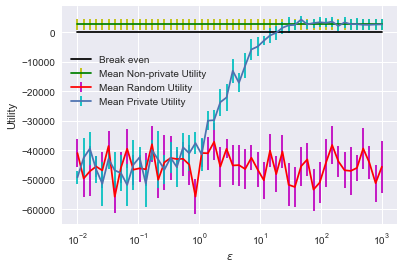

In [58]:
plt.errorbar(epsilon, utility_mean, yerr=utility_std, ecolor='y', label="Mean Non-private Utility", color='g')
plt.errorbar(epsilon, rutility_mean, yerr=rutility_std, ecolor='m', label="Mean Random Utility", color='r')
plt.errorbar(epsilon, putility_mean, yerr=putility_std, ecolor='c', label="Mean Private Utility")
plt.plot(epsilon, np.zeros(es), 'k-', label="Break even")
plt.xscale('log')
plt.xlabel(r"$\epsilon$")
plt.ylabel("Utility")
plt.legend(bbox_to_anchor=(0, 0.5), loc='lower left')

As expected we see the utility equals that of the random banker for high privacy, and as privacy decreases the utility approaches that of the non-private banker. As we have to approach $\epsilon=1$ before the private banker has significant gains over the random banker, and $\epsilon > 10$ for the private banker to make a profit, it's not much privacy we can afford to add. This is not so surprising given the weak signal in the data and the difficulty of the banker in turning a profit even without privacy.

#### Now for testing the banker using private training data

In [59]:
rate = 0.005
es = 50
epsilon = np.logspace(-2, 3, es)
utility_std = np.zeros(es)
utility_mean = np.zeros(es)
putility_std = np.zeros(es)
putility_mean = np.zeros(es)
rutility_std = np.zeros(es)
rutility_mean = np.zeros(es)
banker = NameBanker(default_parameters=True) # Use defaults for quicker fit?
pbanker = NameBanker(default_parameters=True) # Use defaults for quicker fit?
rbanker = RandomBanker()
banker.set_interest_rate(rate)
pbanker.set_interest_rate(rate)
rbanker.set_interest_rate(rate)
for i in range(es):
    total_utility = np.zeros(10)
    priv_utility = np.zeros(10)
    rand_utility = np.zeros(10)
    X = df.copy()
    j = 0
    for train, test in KFold(n_splits=10).split(X):
        banker.fit(X[features].iloc[train], X[target].iloc[train])
        pbanker.private_fit(X[features].iloc[train], X[target].iloc[train], 
                            epsilon[i], numeric_features, binary_features)
        rbanker.fit(X[features].iloc[train], X[target].iloc[train])
        for k in range(len(test)):
            paction = banker.get_private_best_action(X[features].iloc[test[k]], epsilon[i])
            action = banker.get_best_action(X[features].iloc[test[k]])
            raction = rbanker.get_best_action(X[features].iloc[test[k]])
            u = utility(X['amount'].iloc[test[k]], 
                        rate, 
                        X['duration'].iloc[test[k]],
                        X[target].iloc[test[k]].values)

            if action == 1:
                total_utility[j] += u
            if paction == 1:
                priv_utility[j] += u
            if raction == 1:
                rand_utility[j] += u
        j += 1
    utility_mean[i] = np.mean(total_utility)
    utility_std[i] = stats.sem(total_utility)
    putility_mean[i] = np.mean(priv_utility)
    putility_std[i] = stats.sem(priv_utility)
    rutility_mean[i] = np.mean(rand_utility)
    rutility_std[i] = stats.sem(rand_utility)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aleks\Dropbox\A-University\UiO\2018H\IN-STK5000\ml-society-science\src\project-1\aleksaw_banker.py:265: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNeighborsClassifier(n_neighbors=self.knn_k).fit(X, y)]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype in

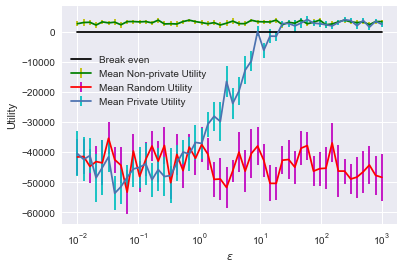

In [60]:
plt.errorbar(epsilon, utility_mean, yerr=utility_std, ecolor='y', label="Mean Non-private Utility", color='g')
plt.errorbar(epsilon, rutility_mean, yerr=rutility_std, ecolor='m', label="Mean Random Utility", color='r')
plt.errorbar(epsilon, putility_mean, yerr=putility_std, ecolor='c', label="Mean Private Utility")
plt.plot(epsilon, np.zeros(es), 'k-', label="Break even")
plt.xscale('log')
plt.xlabel(r"$\epsilon$")
plt.ylabel("Utility")
plt.legend(bbox_to_anchor=(0, 0.5), loc='lower left')

We see again quite the same picture as when applying the exponential mechanism

### 3)

### Choose one concept of fairness, e.g.  balance of decisions with respect to gender.  
+ **How can you ensure that your policy is fair?** 
+ **How can you measure it?**
+ **How does the original training data affect the fairness of your policy?**